In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define the possible values for each categorical variable
buying_options = ['high', 'low']
maint_options = ['vhigh', 'low']
door_options = ['2', '3', '4', '5', 'more']
persons_options = ['2', '3', '4', 'more']
boot_options = ['small', 'med', 'big']
safety_options = ['low', 'med', 'high']
class_options = ['good', 'vgood', 'unacc']

# Generate sample data
np.random.seed(0)  # For reproducibility
data = {
    'buying': np.random.choice(buying_options, size=30),
    'maint': np.random.choice(maint_options, size=30),
    'door': np.random.choice(door_options, size=30),
    'persons': np.random.choice(persons_options, size=30),
    'boot': np.random.choice(boot_options, size=30),
    'safety': np.random.choice(safety_options, size=30),
    'class': np.random.choice(class_options, size=30)
}

# Create the DataFrame
df = pd.DataFrame(data)

df.head(3) 

In [4]:
# Generate random data for the first 9 columns
data = {
    f'col_{i+1}': np.round(np.random.uniform(100.00000, 9999.99999, size=1000), 5) for i in range(9)
}

# Add the target_class column with random 0 or 1
data['target_class'] = np.random.choice([0, 1], size=1000)

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

        col_1       col_2       col_3       col_4       col_5       col_6  \
0  6445.27516  8016.81003  2247.95279  5845.96671  2999.26448  1339.00075   
1  5102.28635  1486.56330  6531.21946  8713.17376  5065.77565  8957.78273   
2   829.15547  6388.22997  2655.55416   105.04868  7337.54952  1076.75596   
3  2646.06467  5956.74470  7438.85547  8720.32696  8758.82319  7455.16446   
4  4698.19610  4088.24662  4999.59718  6273.80596  2389.92903  9392.32783   

        col_7       col_8       col_9  target_class  
0  8440.13198  2706.67334   322.16643             1  
1  7730.80917  2341.52810   437.36885             0  
2  7549.38866  7198.74080  6183.25994             1  
3   998.81970  5799.27146  3134.19457             0  
4  8621.53134  2764.67735  2927.19894             0  


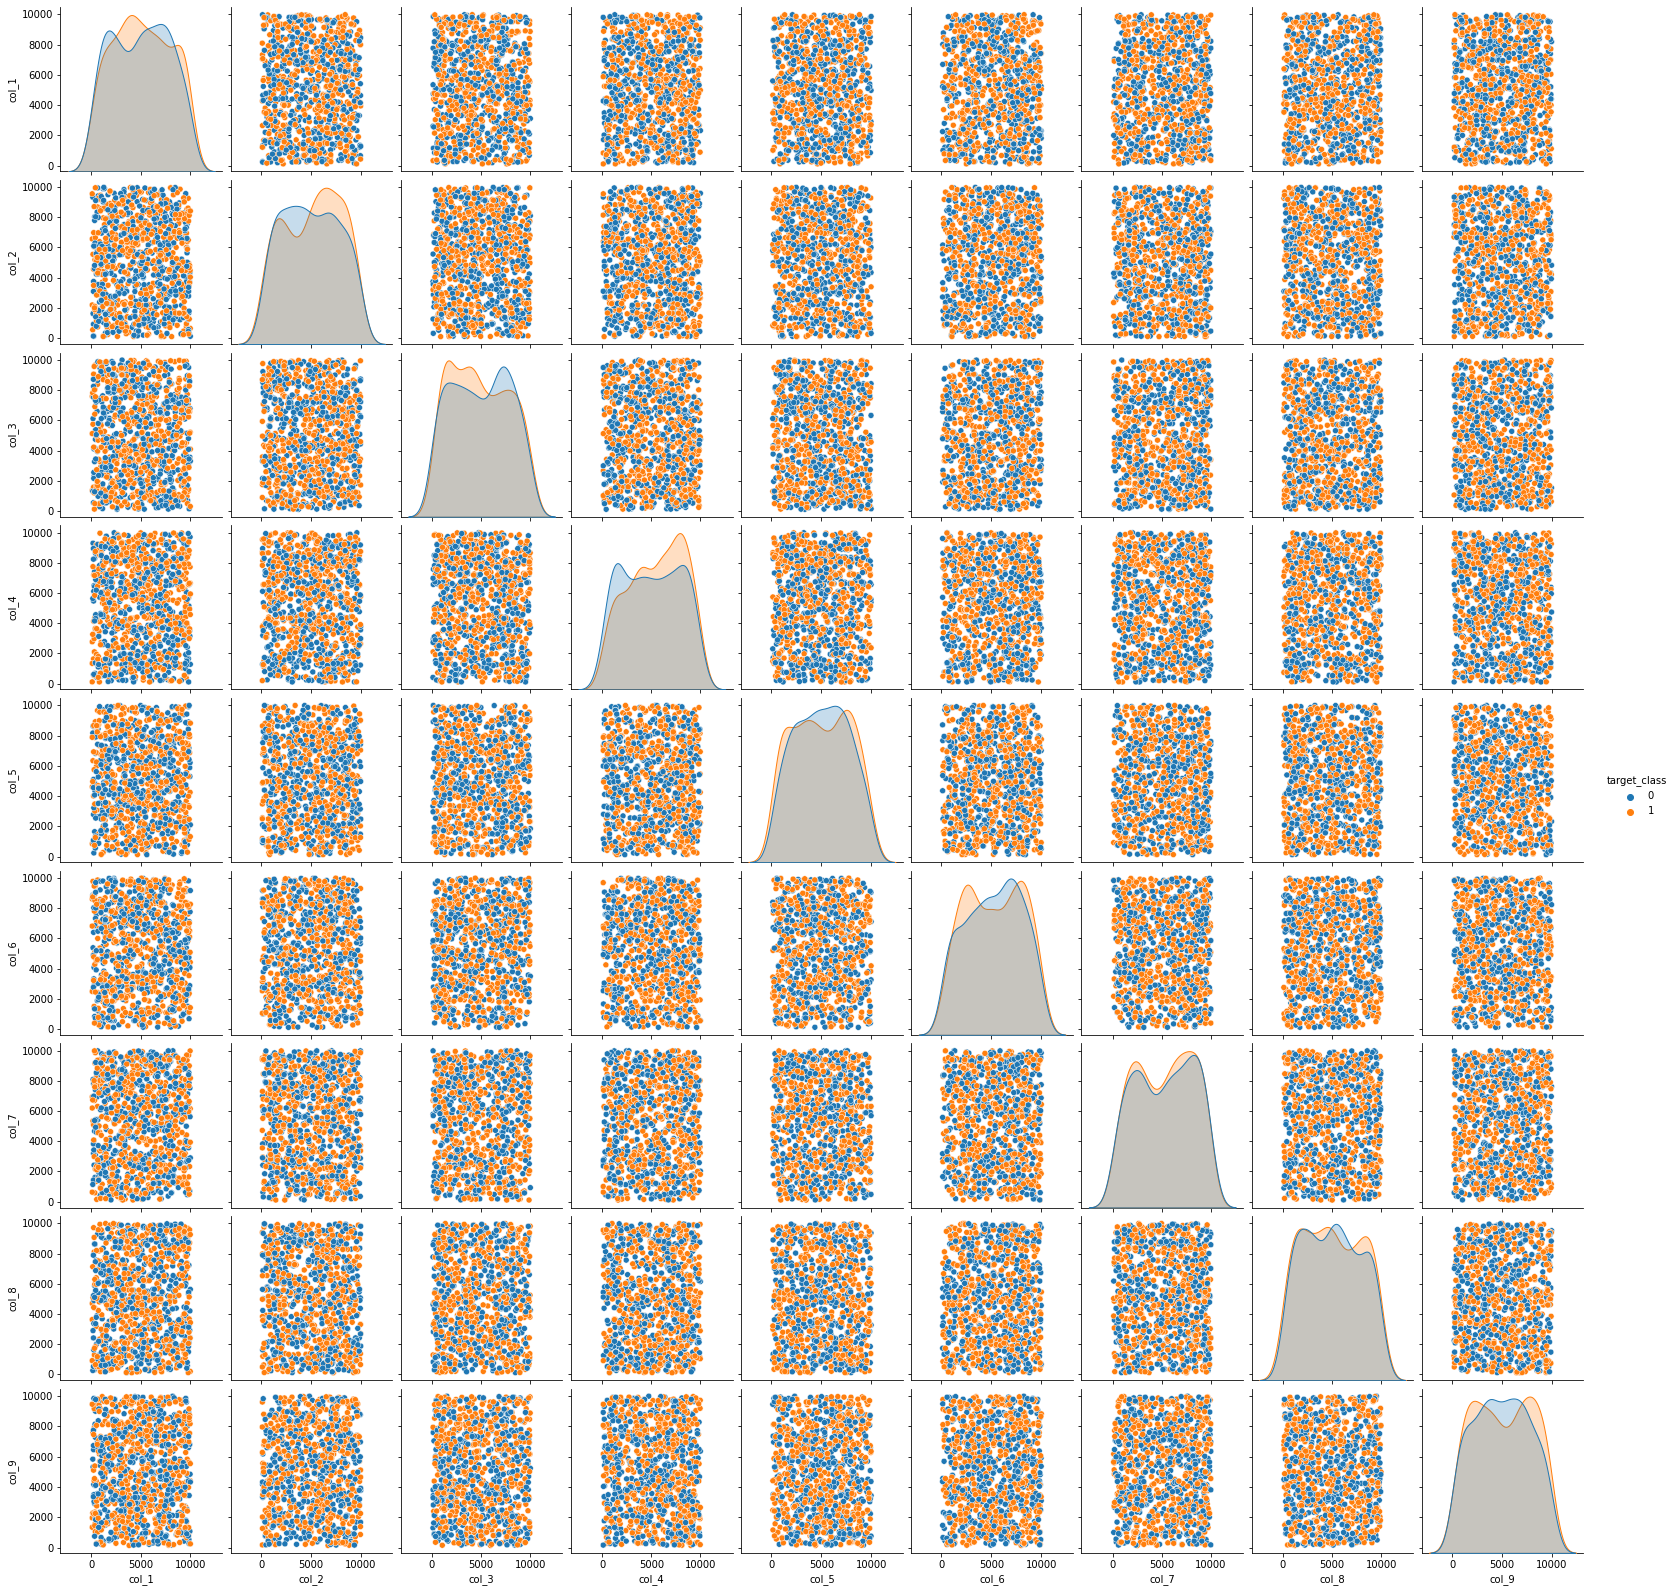

In [5]:
sns.pairplot(df, hue='target_class')

####  Standard the data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
scaler.fit(df.drop('target_class', axis=1))

StandardScaler()

In [9]:
scaled=scaler.transform(df.drop('target_class', axis=1))
scaled

array([[ 0.49312776,  1.0519785 , -0.91511899, ...,  1.0958053 ,
        -0.78230796, -1.67085982],
       [ 0.02001346, -1.27441676,  0.57184974, ...,  0.8507576 ,
        -0.90869281, -1.63016445],
       [-1.48534483,  0.47179813, -0.77361706, ...,  0.78808278,
         0.77249606,  0.39957717],
       ...,
       [-0.66773399,  0.25886122, -1.27418325, ..., -0.2046435 ,
         1.55893041, -0.50793808],
       [-1.65960964, -1.08950489,  1.08892745, ...,  1.63326877,
        -1.12093627, -0.17330801],
       [-0.82473079, -0.59390244, -0.1125366 , ...,  0.36179589,
         0.36753769,  0.46217768]])

In [10]:
scaled_feat=pd.DataFrame(scaled, columns=df.columns[:-1])
scaled_feat.head()



,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,0.493128,1.051978,-0.915119,0.215813,-0.735074,-1.397496,1.095805,-0.782308,-1.670860
1,0.020013,-1.274417,0.571850,1.221130,0.019455,1.344890,0.850758,-0.908693,-1.630164
2,-1.485345,0.471798,-0.773617,-1.797100,0.848929,-1.491891,0.788083,0.772496,0.399577
3,-0.845276,0.318082,0.886943,1.223638,1.367867,0.804022,-1.474923,0.288109,-0.677508
4,-0.122341,-0.347569,0.040135,0.365825,-0.957556,1.501305,1.158473,-0.762231,-0.750630


In [11]:
X=scaled_feat
y=df['target_class']

In [12]:
print(len(X))
print(len(y))
      

1000
1000


In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=123, stratify=y)

<IPython.core.display.Javascript object>

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

600
600
400
400


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
mo_model=KNeighborsClassifier(n_neighbors=1)

In [17]:
mo_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred=mo_model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[107  89]
 [ 99 105]]
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       196
           1       0.54      0.51      0.53       204

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



In [22]:
error_rate=[]
for i in range(1,35):
    mo_model=KNeighborsClassifier(n_neighbors=i)
    mo_model.fit(X_train,y_train)
    pred_i=mo_model.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'error rate')

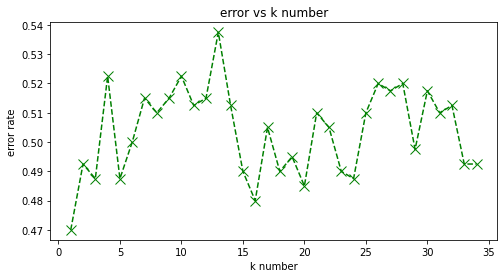

In [23]:
plt.figure(figsize=(8,4))
plt.plot(range(1,35), error_rate, color='green', ls="--", marker="x", markersize=10)
plt.title("error vs k number")
plt.xlabel("k number")
plt.ylabel("error rate")

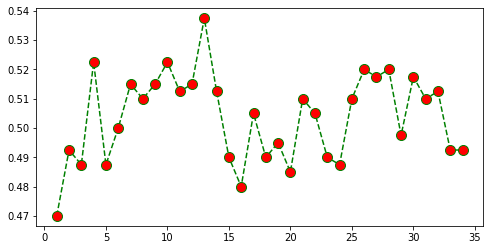

In [24]:
plt.figure(figsize=(8,4))
plt.plot(range(1,35), error_rate, color='green', ls="--", marker="o", markersize=10, markerfacecolor='red')

In [25]:
# Best n =21
mo_model=KNeighborsClassifier(n_neighbors=21)
mo_model.fit(X_train, y_train)
pred=mo_model.predict(X_test)

In [26]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 99  97]
 [107  97]]
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       196
           1       0.50      0.48      0.49       204

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400



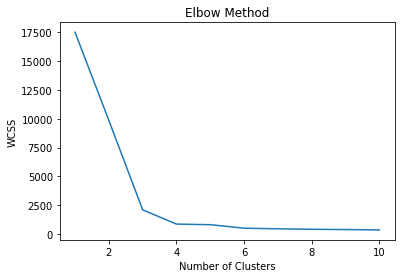

In [27]:
### Optimum K value
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the results
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

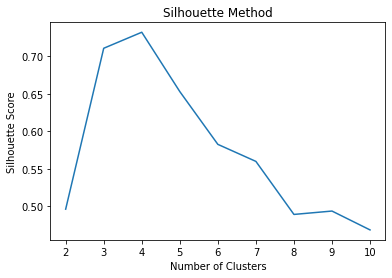

In [28]:
from sklearn.metrics import silhouette_score

# Silhouette method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the results
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()